# 이미지 데이터 셋을 이용한 CNN Modeling
## Animals Dataset Categorical Classification
* Train_Data : 5000
* Valid_Data : 3000
* Test_Data : 3000

In [1]:
import warnings
warnings.filterwarnings('ignore')

* Import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.10.0'

# I. wget From Github

> ## 1) 'animals_part.zip' 파일 다운로드

In [3]:
# !wget https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.zip

--2023-01-26 01:31:22--  https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88551715 (84M) [application/zip]
Saving to: ‘animals_part.zip’

animals_part.zip    100%[===================>]  84.45M   195MB/s    in 0.4s    

2023-01-26 01:31:23 (195 MB/s) - ‘animals_part.zip’ saved [88551715/88551715]



In [4]:
# !wget https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z01

--2023-01-26 01:31:23--  https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z01
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘animals_part.z01’

animals_part.z01    100%[===================>]  90.00M   113MB/s    in 0.8s    

2023-01-26 01:31:25 (113 MB/s) - ‘animals_part.z01’ saved [94371840/94371840]



In [5]:
# !wget https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z02

--2023-01-26 01:31:25--  https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z02
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘animals_part.z02’

animals_part.z02    100%[===================>]  90.00M   163MB/s    in 0.6s    

2023-01-26 01:31:26 (163 MB/s) - ‘animals_part.z02’ saved [94371840/94371840]



* 다운로드 결과 확인

In [6]:
# !ls -l

total 270804
-rw-r--r-- 1 root root 94371840 Jan 26 01:31 animals_part.z01
-rw-r--r-- 1 root root 94371840 Jan 26 01:31 animals_part.z02
-rw-r--r-- 1 root root 88551715 Jan 26 01:31 animals_part.zip
drwxr-xr-x 1 root root     4096 Jan 24 14:38 sample_data


> ## 2) 분할된 파일 합치기

In [7]:
# !zip -Fq animals_part.zip --out animals.zip

* 'animals.zip' 생성 확인

In [8]:
# !ls -l

total 541604
-rw-r--r-- 1 root root  94371840 Jan 26 01:31 animals_part.z01
-rw-r--r-- 1 root root  94371840 Jan 26 01:31 animals_part.z02
-rw-r--r-- 1 root root  88551715 Jan 26 01:31 animals_part.zip
-rw-r--r-- 1 root root 277295391 Jan 26 01:31 animals.zip
drwxr-xr-x 1 root root      4096 Jan 24 14:38 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'animals.zip'

In [9]:
# !unzip -q /content/animals.zip

* 학습 데이터 확인

In [10]:
# !ls -l animals/

total 12
drwxr-xr-x 12 root root 4096 Oct 25 13:50 test
drwxr-xr-x 12 root root 4096 Oct 25 13:50 train
drwxr-xr-x 12 root root 4096 Oct 25 13:50 validation


> ## 2) Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [3]:
train_dir = './../../../secret/example_data/15_DL/animals/train'
valid_dir = './../../../secret/example_data/15_DL/animals/validation'
test_dir  = './../../../secret/example_data/15_DL/animals/test'

> ## 3) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# With Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

# With Augmentation
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'categorical')

# Without Augmentation
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Without Augmentation
valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'categorical')

Found 5000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


> ## 4) Test train_generator

In [5]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20, 10)


In [6]:
labels_batch

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# III. CNN Keras Modeling

> ## 1) Model Define

* Feature Extraction & Classification

In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

> ## 2) Model Compile

* 모델 학습방법 설정

In [17]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 25분

In [18]:
# %%time

Hist_animal = model.fit(train_generator,
                        steps_per_epoch = 250,
                        epochs = 30,
                        validation_data = valid_generator,
                        validation_steps = 150)

Epoch 1/30
250/250 [==============================] - 49s 162ms/step - loss: 2.2327 - accuracy: 0.1594 - val_loss: 2.2725 - val_accuracy: 0.2000
Epoch 2/30
250/250 [==============================] - 41s 165ms/step - loss: 2.0809 - accuracy: 0.2386 - val_loss: 1.9000 - val_accuracy: 0.3107
Epoch 3/30
250/250 [==============================] - 40s 162ms/step - loss: 1.9721 - accuracy: 0.2850 - val_loss: 2.0117 - val_accuracy: 0.2690
Epoch 4/30
250/250 [==============================] - 40s 158ms/step - loss: 1.9023 - accuracy: 0.3072 - val_loss: 2.0051 - val_accuracy: 0.2780
Epoch 5/30
250/250 [==============================] - 40s 158ms/step - loss: 1.8302 - accuracy: 0.3348 - val_loss: 1.9022 - val_accuracy: 0.3177
Epoch 6/30
250/250 [==============================] - 39s 158ms/step - loss: 1.7710 - accuracy: 0.3558 - val_loss: 1.7837 - val_accuracy: 0.3520
Epoch 7/30
250/250 [==============================] - 39s 158ms/step - loss: 1.7053 - accuracy: 0.3820 - val_loss: 1.8299 - val_ac

> ## 4) 학습 결과 시각화

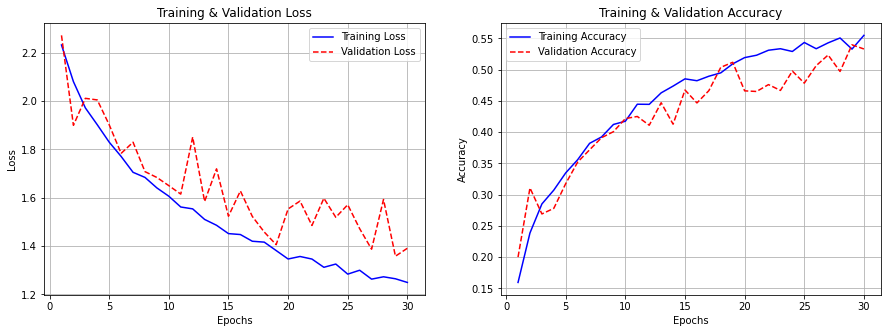

In [19]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_animal.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_animal.history['loss'], 'b-')
plt.plot(epochs, Hist_animal.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_animal.history['accuracy'], 'b-')
plt.plot(epochs, Hist_animal.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* test_generator

In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'categorical')

Found 3000 images belonging to 10 classes.


* Loss & Accuracy

In [21]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 150, 
                                verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 1.33760
Accuracy = 0.52467


# 
# 
# 
# The End
# 
# 
# 